# Import software libraries and load the dataset #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import LeakyReLU
import keras
import keras.utils
from keras import utils as np_utils
import warnings
warnings.filterwarnings('ignore')

# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [2]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print('Training data shape :', x_train.shape, y_train.shape)
print('Testing data shape  :', x_test.shape, y_test.shape)
print(f"Number of training images: {x_train.shape[0]}")
print(f"Number of testing images: {x_test.shape[0]}")
classes = np.unique(y_train)
print('The number of labels :', classes)

Training data shape : (60000, 28, 28) (60000,)
Testing data shape  : (10000, 28, 28) (10000,)
Number of training images: 60000
Number of testing images: 10000
The number of labels : [0 1 2 3 4 5 6 7 8 9]


# What is the shape of each image?

In [3]:
print('Training image shape :', x_train.shape, y_train.shape)
print('Testing image shape  :', x_test.shape, y_test.shape)

Training image shape : (60000, 28, 28) (60000,)
Testing image shape  : (10000, 28, 28) (10000,)


# The labels are encoded, find the name of each encoded label.

In [4]:
C_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in range(len(classes)):
    print(f"Class {classes[i]}: {C_name[classes[i]]}")

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


# Plot 25 samples from the dataset

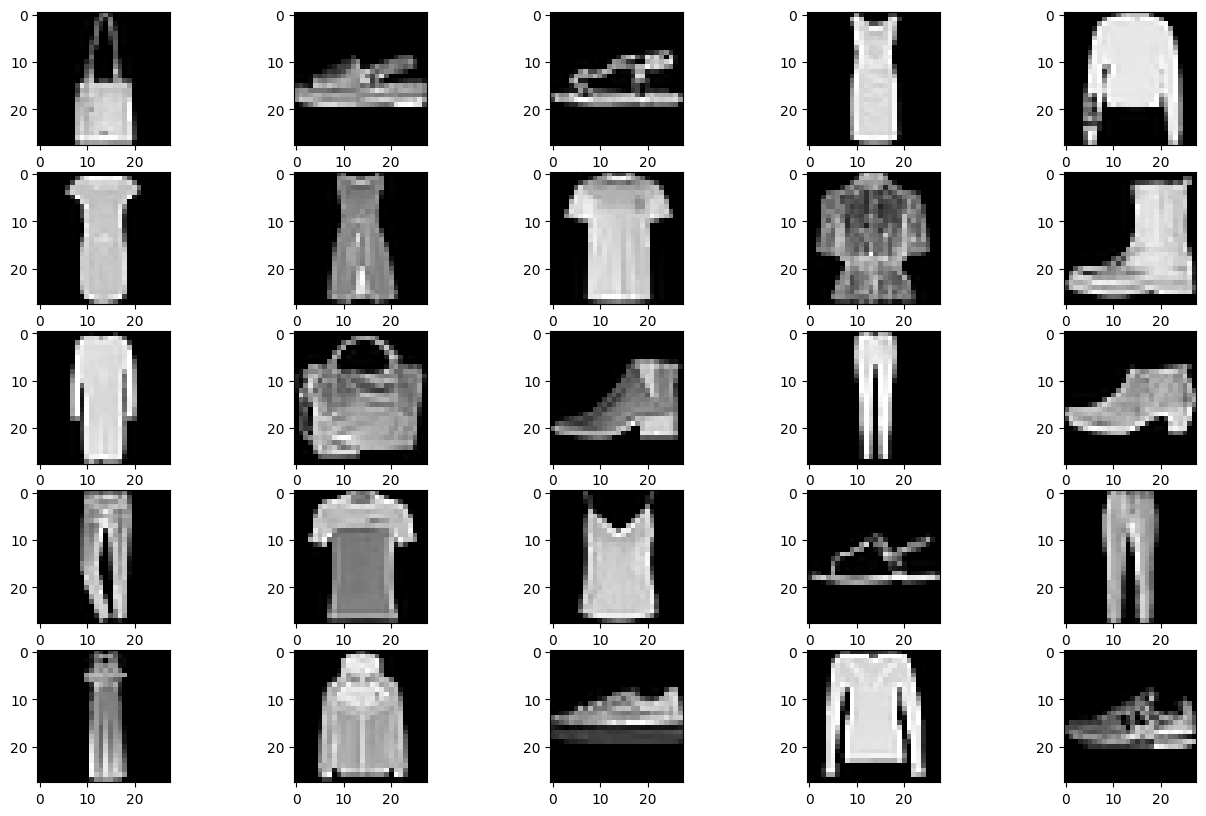

In [5]:
plt.figure(figsize=(16,10))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j)
    j += 1
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')


# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [6]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [7]:
y_train.shape

(60000,)

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split the datasets into training and testing

- Hint : Use the training set (training and validation sets).
- Do not worry about the testing set provided from the dataset we will get with later on, do not touch it!!

In [10]:
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [17]:
def createModel():
#     LeakyReLU It is an attempt to solve the dying ReLU problem

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(10, activation='softmax'))

    return model

 i used (relu) because it is the most common function used for hidden layers, it is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. 
and in output layer i used (softmax) as activation function beacause it is suitable for our problem 
which is multiclassification.
NOTE: when i add activation layer after each conv layer the accuracy is decreased, so i continue 
without this layer.

In [18]:
model = createModel()

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [19]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

# Give me a summary of the NN

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                  │ (None, 28, 28, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 14, 14, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)                  │ (None, 14, 14, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 7, 7, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_4 (Conv2D)                  │ (None, 7, 7, 128)             │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 3, 3, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 1152)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 10)                    │      11,530 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

In [21]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

# i tried to plot the structure but i got an errors in each time, i tried to solve errors and
# download the libraries needed but still i got error.


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [22]:
history = model.fit(
    x_train, y_train, batch_size=16,
    epochs=10, verbose=1, validation_data=(x_validation, y_validation)
)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.7831 - loss: 1.3183 - val_accuracy: 0.8717 - val_loss: 0.3490
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - accuracy: 0.8828 - loss: 0.3339 - val_accuracy: 0.8771 - val_loss: 0.3396
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - accuracy: 0.8929 - loss: 0.2961 - val_accuracy: 0.8816 - val_loss: 0.3181
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 64s 21ms/step - accuracy: 0.8995 - loss: 0.2736 - val_accuracy: 0.8905 - val_loss: 0.3030
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.9066 - loss: 0.2576 - val_accuracy: 0.8772 - val_loss: 0.3440
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 69s 23ms/step - accuracy: 0.9104 - loss: 0.2444 - val_accuracy: 0.8941 - val_loss: 0.2919
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - accuracy: 0.9120 - loss: 0.2363 - val_accuracy: 0.8976 - val_loss: 0.2836
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 73s 24ms/step - accuracy: 0.9175 -

# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [23]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8884 - loss: 0.3463


[0.3491704761981964, 0.8895999789237976]

# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [24]:
y_pred = model.predict(x_test)
print("First ten predictions: ", y_pred[:10])
print("Actual values: ", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
First ten predictions:  [[2.59944431e-12 1.66309241e-16 1.34173517e-14 1.33572130e-15
  1.02971919e-11 3.16535716e-06 5.96168189e-13 9.88007098e-09
  2.02341671e-10 9.99996781e-01]
 [5.89074546e-07 1.85386781e-14 9.99994397e-01 4.57179043e-12
  4.79853543e-06 7.90095604e-16 1.92156776e-07 1.91214255e-18
  2.27133348e-13 8.61503828e-15]
 [3.34852969e-18 1.00000000e+00 1.02089433e-16 2.06590192e-15
  1.59078148e-16 5.28309709e-23 5.62718718e-19 1.41607563e-22
  1.86525131e-19 1.90445427e-23]
 [1.55833957e-11 1.00000000e+00 4.16672079e-12 1.04671418e-08
  1.04658296e-11 1.26279245e-16 3.66956552e-12 1.05948681e-16
  4.42324772e-14 2.82902413e-16]
 [1.61182210e-01 6.76026746e-09 1.25206802e-02 7.87723577e-04
  7.65357465e-02 4.72956474e-09 7.48973250e-01 2.79037171e-09
  2.25201529e-08 4.73026489e-07]
 [7.37401981e-15 1.00000000e+00 1.19782886e-13 1.58278230e-12
  2.58590921e-15 1.82745846e-19 6.25270987e-16 3.80685643e-22
  1.13658032e-17 5.9510311

# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

# Save the model as pickle file

In [36]:
import pickle
pickle_out = open("model.pkl",'wb')
pickle.dump(model,pickle_out)
pickle_out.close()

